In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os,sys,gc
pd.set_option("max_columns",300)
pd.set_option("max_rows",300)

In [2]:
train = pd.read_csv("../input/train.csv")

In [3]:
train.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074


In [4]:
st = pd.read_csv("../input/structures.csv")

In [5]:
st.head()

,molecule_name,atom_index,atom,x,y,z
0,dsgdb9nsd_000001,0,C,-0.012698,1.085804,0.008001
1,dsgdb9nsd_000001,1,H,0.002150,-0.006031,0.001976
2,dsgdb9nsd_000001,2,H,1.011731,1.463751,0.000277
3,dsgdb9nsd_000001,3,H,-0.540815,1.447527,-0.876644
4,dsgdb9nsd_000001,4,H,-0.523814,1.437933,0.906397


[]

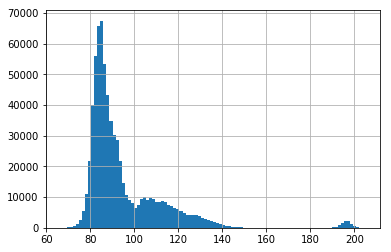

In [6]:
train[train["type"]=="1JHC"]["scalar_coupling_constant"].hist(bins=100).plot()

In [15]:
oof = pd.read_csv("../log/20190713_215137_add_atomBondFeat_type_tmp/oof_1JHC.csv")

In [13]:
train_select = train[train.type == "1JHC"].reset_index(drop=False)

In [16]:
oof.shape, train_select.shape

((709416, 2), (709416, 7))

In [17]:
oof = pd.concat([oof, train_select],axis=1)

In [21]:
oof["error"] = oof["oof_preds"] - oof["scalar_coupling_constant"]
oof["error_abs"] = np.abs(oof["error"])

In [23]:
oof.head(100)

,id,oof_preds,index,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,error,error_abs
0,0,108.248817,0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076,23.441217,23.441217
1,4,107.239159,4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074,22.431759,22.431759
2,7,109.483174,7,7,dsgdb9nsd_000001,3,0,1JHC,84.8093,24.673874,24.673874
3,9,103.133305,9,9,dsgdb9nsd_000001,4,0,1JHC,84.8095,18.323805,18.323805
4,17,200.182063,17,17,dsgdb9nsd_000005,2,0,1JHC,171.2200,28.962063,28.962063
5,19,83.869864,19,19,dsgdb9nsd_000007,2,0,1JHC,83.5429,0.326964,0.326964
6,26,81.214816,26,26,dsgdb9nsd_000007,3,0,1JHC,83.5417,-2.326884,2.326884
7,32,82.966449,32,32,dsgdb9nsd_000007,4,0,1JHC,83.5484,-0.581951,0.581951
8,38,86.519405,38,38,dsgdb9nsd_000007,5,1,1JHC,83.5418,2.977605,2.977605
9,42,85.371746,42,42,dsgdb9nsd_000007,6,1,1JHC,83.5430,1.828746,1.828746


[]

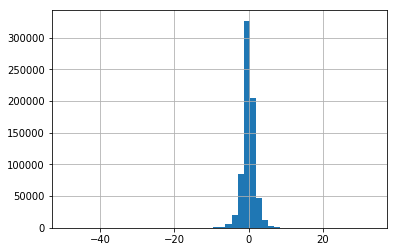

In [26]:
oof["error"].hist(bins=50).plot()


[]

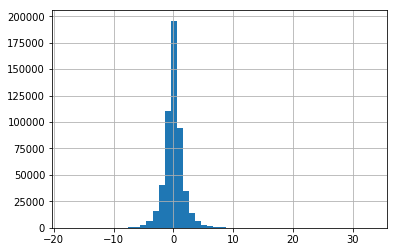

In [27]:
oof[oof["scalar_coupling_constant"] < 100]["error"].hist(bins=50).plot()

[]

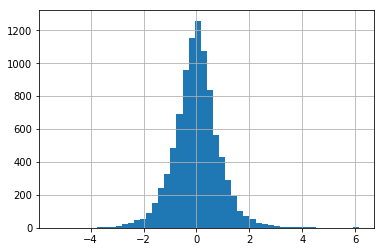

In [28]:
oof[oof["scalar_coupling_constant"] > 180]["error"].hist(bins=50).plot()

[]

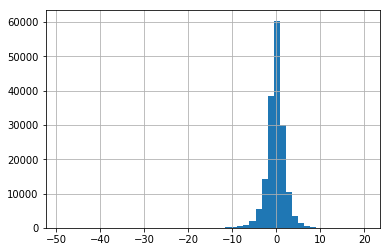

In [29]:
oof[(oof["scalar_coupling_constant"] > 100)&(oof["scalar_coupling_constant"] < 140)]["error"].hist(bins=50).plot()

In [30]:
oof.sort_values("error")

,id,oof_preds,index,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,error,error_abs
408377,2725354,83.673028,2725354,2725354,dsgdb9nsd_081580,12,4,1JHC,132.6160,-48.942972,48.942972
700606,4590788,109.362149,4590788,4590788,dsgdb9nsd_129152,10,5,1JHC,158.0310,-48.668851,48.668851
282947,1871397,72.666105,1871397,1871397,dsgdb9nsd_059827,13,3,1JHC,111.9450,-39.278895,39.278895
408371,2725291,97.775737,2725291,2725291,dsgdb9nsd_081578,12,4,1JHC,134.5240,-36.748263,36.748263
702357,4609823,118.239549,4609823,4609823,dsgdb9nsd_130535,10,5,1JHC,147.1350,-28.895451,28.895451
697462,4572257,99.919873,4572257,4572257,dsgdb9nsd_128113,13,4,1JHC,128.6460,-28.726127,28.726127
222964,1485712,117.565858,1485712,1485712,dsgdb9nsd_048217,9,1,1JHC,146.0510,-28.485142,28.485142
700481,4589717,117.768651,4589717,4589717,dsgdb9nsd_129053,11,3,1JHC,145.1090,-27.340349,27.340349
463703,3100343,90.563116,3100343,3100343,dsgdb9nsd_090694,12,4,1JHC,117.6380,-27.074884,27.074884
605735,4011353,109.874040,4011353,4011353,dsgdb9nsd_113174,14,4,1JHC,136.6600,-26.785960,26.785960


## 間違いが大きかった分子をチェック

In [31]:
oof[oof.molecule_name == "dsgdb9nsd_081580"]

,id,oof_preds,index,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,error,error_abs
408377,2725354,83.673028,2725354,2725354,dsgdb9nsd_081580,12,4,1JHC,132.6160,-48.942972,48.942972
408378,2725362,111.640084,2725362,2725362,dsgdb9nsd_081580,13,5,1JHC,109.1010,2.539084,2.539084
408379,2725370,112.119373,2725370,2725370,dsgdb9nsd_081580,14,7,1JHC,109.1020,3.017373,3.017373
408380,2725377,94.725697,2725377,2725377,dsgdb9nsd_081580,15,8,1JHC,99.8365,-5.110803,5.110803


In [33]:
oof[oof.error_abs < 10]["error_abs"].mean()

1.1759471478506758

In [36]:
oof.sort_values("scalar_coupling_constant").iloc[:300]

,id,oof_preds,index,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,error,error_abs
195689,1293804,73.763369,1293804,1293804,dsgdb9nsd_041909,16,6,1JHC,66.6008,7.162569,7.162569
496564,3324500,67.822554,3324500,3324500,dsgdb9nsd_095881,17,5,1JHC,66.9264,0.896154,0.896154
195635,1293482,70.686849,1293482,1293482,dsgdb9nsd_041902,18,6,1JHC,67.0566,3.630249,3.630249
466391,3119945,72.294527,3119945,3119945,dsgdb9nsd_091113,17,7,1JHC,67.1031,5.191427,5.191427
585082,3876839,71.782201,3876839,3876839,dsgdb9nsd_110064,12,2,1JHC,67.2730,4.509201,4.509201
195773,1294440,66.924533,1294440,1294440,dsgdb9nsd_041920,15,5,1JHC,67.3237,-0.399167,0.399167
195960,1295693,68.853003,1295693,1295693,dsgdb9nsd_041957,18,7,1JHC,67.3294,1.523603,1.523603
195955,1295658,71.380564,1295658,1295658,dsgdb9nsd_041957,13,3,1JHC,67.3295,4.051064,4.051064
496633,3324941,69.341238,3324941,3324941,dsgdb9nsd_095889,15,5,1JHC,67.4132,1.928038,1.928038
169669,1110519,71.221765,1110519,1110519,dsgdb9nsd_037798,15,4,1JHC,67.5966,3.625165,3.625165


In [38]:
oof[oof.molecule_name=="dsgdb9nsd_041920"]

,id,oof_preds,index,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,error,error_abs
195767,1294392,85.971734,1294392,1294392,dsgdb9nsd_041920,9,0,1JHC,87.1481,-1.176366,1.176366
195768,1294399,87.554210,1294399,1294399,dsgdb9nsd_041920,10,0,1JHC,88.0598,-0.505590,0.505590
195769,1294406,117.075161,1294406,1294406,dsgdb9nsd_041920,11,2,1JHC,113.3710,3.704161,3.704161
195770,1294413,98.067161,1294413,1294413,dsgdb9nsd_041920,12,3,1JHC,99.1536,-1.086439,1.086439
195771,1294423,80.485449,1294423,1294423,dsgdb9nsd_041920,13,4,1JHC,82.4924,-2.006951,2.006951
195772,1294432,82.614722,1294432,1294432,dsgdb9nsd_041920,14,4,1JHC,82.4989,0.115822,0.115822
195773,1294440,66.924533,1294440,1294440,dsgdb9nsd_041920,15,5,1JHC,67.3237,-0.399167,0.399167
195774,1294447,85.723670,1294447,1294447,dsgdb9nsd_041920,16,6,1JHC,87.1280,-1.404330,1.404330
195775,1294453,88.360038,1294453,1294453,dsgdb9nsd_041920,17,6,1JHC,88.0659,0.294138,0.294138
195776,1294459,116.413547,1294459,1294459,dsgdb9nsd_041920,18,8,1JHC,113.3720,3.041547,3.041547


In [51]:
st.head()

,molecule_name,atom_index,atom,x,y,z
0,dsgdb9nsd_000001,0,C,-0.012698,1.085804,0.008001
1,dsgdb9nsd_000001,1,H,0.002150,-0.006031,0.001976
2,dsgdb9nsd_000001,2,H,1.011731,1.463751,0.000277
3,dsgdb9nsd_000001,3,H,-0.540815,1.447527,-0.876644
4,dsgdb9nsd_000001,4,H,-0.523814,1.437933,0.906397
